In [1]:
# load libraries

import glob
import os
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's have a look at the files

path = r'C:\Users\sonja tilly.ABERDEEN\text_docs\*'

files = glob.glob(path)

files[0:10]

['C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Aberdeen.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Alliance Bernstein.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Allianz.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Amundi.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Aviva.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\AXA.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Barclays.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\BlackRock.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\BlueBay.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\BNP Paribas.txt']

In [3]:
# let's read in the files and append to a list of lists

list_of_lists = []

for file in files:
    text_file = open(file)
    lines = text_file.readlines()
    list_of_lists.append(lines)
    text_file.close()

In [4]:
list_of_lists[0][:5]

['Aberdeen\n',
 'Economic Outlook – January 2018\n',
 'Monthly highlights: Global economic strength to continue in 2018\n',
 'The global economy showed no sign of losing any momentum\n',
 'in 2017 Q4 and is heading into 2018 in a healthy state. We have\n']

In [5]:
# extract list of file company names

list_of_names = []

for f in files:
    head, tail = os.path.split(f)
    name = os.path.splitext(os.path.basename(tail))[0]
    list_of_names.append(name)
    
print('Number of documents:', len(list_of_names))
print(' ')
print(list_of_names)

Number of documents: 61
 
['Aberdeen', 'Alliance Bernstein', 'Allianz', 'Amundi', 'Aviva', 'AXA', 'Barclays', 'BlackRock', 'BlueBay', 'BNP Paribas', 'Candriam', 'Capital Economics', 'Citi', 'ClearBridge', 'Credit Suisse', 'Danske Bank', 'Deutsche Bank', 'Eastspring', 'Fidelity', 'Fisher Investments', 'Franklin Templeton', 'GAM', 'Goldman Sachs', 'Hermes', 'HSBC', 'ING', 'Invesco', 'Investec', 'JanusHenderson', 'JOHCM', 'JPM', 'Kames Capital', 'Legg Mason', 'Liontrust', 'Lloyds Bank', 'Loomis Sayles', 'Macquarie', 'MAN GLG', 'MandG', 'Mirabaud', 'Morgan Stanley', 'Muzinich', 'Neptune', 'Neuberger Berman', 'Nordea', 'Pictet', 'Pimco', 'RLAM', 'Robeco', 'Sanlam', 'Schroders', 'SEB', 'Smith&Williamson', 'Standard Life', 'T Rowe Price', 'Threadneedle', 'UBP', 'UBS', 'Unicredit', 'Vanguard', 'Wellington']


In [6]:
# load nltk's English stopwords as 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')
more_stopwords = ['and', 'to', 'the', 'we', 'of', 'in', 'are', 'on', 'stephan',
                 'year', 'investment', 'investor', 'portfolio', 'analyst', 'q',
                 'manager', 'outlook', 'fund', 'economy', 'market', 'bank']
stopwords.extend(more_stopwords)
print(stopwords[0:10])

# create tokenizer that picks out sequences of alphanumeric characters as tokens and drops everything else
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from nltk import pos_tag

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [7]:
# tidy up list of lists

def tidy_up(temp0):
    temp1 = [[t.lower() for t in l] for l in temp0]
    temp2 = [[t.replace('\n','') for t in l] for l in temp1]
    temp3 = [[t.replace('\r','') for t in l] for l in temp2]
    temp4 = [[pos_tag(tokenizer.tokenize(t)) for t in l] for l in temp3]
    return temp4

In [8]:
# create function to create list of sentences

def raw_text(lol):
    temp = []
    for i in lol:
        sent = " ".join(str(item) for item in i)
        temp.append(sent)
    return temp

In [9]:
tokens = tidy_up(list_of_lists)

tokens[0][1]

[('economic', 'JJ'), ('outlook', 'NN'), ('january', 'NN'), ('2018', 'CD')]

In [10]:
# extract nouns

from nltk import pos_tag

nouns = []

for t in tokens:
    tmp = []
    for l in t:
        for token, pos in l:
            if pos.startswith('N'):
                tmp.append(token)
            
    nouns.append(tmp) 



In [11]:
nouns[0][0:10]

['aberdeen',
 'outlook',
 'january',
 'highlights',
 'strength',
 'economy',
 'sign',
 'momentum',
 'q4',
 'state']

In [12]:
# load nltk's Lemmatizer

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()    

In [13]:
# lemmatize tokens

lems = []

for lst in nouns:
    temp = []
    for l in lst:
        st = wordnet_lemmatizer.lemmatize(l)
        temp.append(st)
    lems.append(temp) 

In [14]:
lems[0][0:10]

['aberdeen',
 'outlook',
 'january',
 'highlight',
 'strength',
 'economy',
 'sign',
 'momentum',
 'q4',
 'state']

In [15]:
lems_sent = raw_text(lems)


In [16]:
# remove stopwords from stems

clean_lems = [[i for i in l.split() if i not in stopwords] for l in lems_sent]
clean_lems[0][0:10]


['aberdeen',
 'january',
 'highlight',
 'strength',
 'sign',
 'momentum',
 'q4',
 'state',
 'forecast',
 'growth']

In [17]:
corpus = raw_text(clean_lems)
corpus[0][0:200]

'aberdeen january highlight strength sign momentum q4 state forecast growth percentage point purchasing index pmi level month trade prospect commodity price manufacturer commodity producer growth whole'

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# try Word Frequencies with TfidfVectorizer

def tfidf_vectorizer(text):
          
    # create the transform
    vectorizer = TfidfVectorizer()    
        
    # fit and encode text
    vector = vectorizer.fit_transform(text)

    # summarize encoded vector
    #print(vector.shape)
    array = vector.toarray()
        
    return array

In [19]:
text_array = tfidf_vectorizer(corpus)

In [20]:
# export to csv

#a = np.asarray(text_array)
#np.savetxt("text_array.csv", a, delimiter=",")

# Reduce data to 2 dimensions

Isomap is one representative of isometric mapping methods, and extends metric multidimensional scaling (MDS) by incorporating the geodesic distances imposed by a weighted graph. To be specific, the classical scaling of metric MDS performs low-dimensional embedding based on the pairwise distance between data points, which is generally measured using straight-line Euclidean distance. Isomap is distinguished by its use of the geodesic distance induced by a neighborhood graph embedded in the classical scaling. This is done to incorporate manifold structure in the resulting embedding. Isomap defines the geodesic distance to be the sum of edge weights along the shortest path between two nodes (computed using Dijkstra's algorithm, for example). The top n eigenvectors of the geodesic distance matrix, represent the coordinates in the new n-dimensional Euclidean space.

A very high-level description of Isomap algorithm is given below.

Determine the neighbors of each point.
All points in some fixed radius.
K nearest neighbors.
Construct a neighborhood graph.
Each point is connected to other if it is a K nearest neighbor.
Edge length equal to Euclidean distance.
Compute shortest path between two nodes.
Dijkstra's algorithm
Floyd–Warshall algorithm
Compute lower-dimensional embedding.
Multidimensional scaling

Source: https://en.wikipedia.org/wiki/Isomap

In [21]:
# reduce dimensions with Isomap

from sklearn.manifold import Isomap

iso = Isomap(n_components=2)

red = iso.fit_transform(text_array)  # shape (n_components, n_samples)

red_df = pd.DataFrame(red, columns=['X','Y'])


In [22]:
red_df.head()

,X,Y
0,-1.244739,-0.224211
1,-1.152026,0.269694
2,0.104146,-0.130212
3,-0.117397,-0.254435
4,-0.547550,-0.734749


In [23]:
# set up kmeans algorithm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

def clusterKMeans(k):
    clusterer = KMeans(n_clusters=k, random_state=47).fit(red_df)
    centroids = clusterer.cluster_centers_
    labels = clusterer.labels_
    score = silhouette_score(red_df, clusterer.labels_, metric='euclidean')
    samples_score = silhouette_samples(red_df, clusterer.labels_, metric='euclidean')
    return centroids, labels, score, samples_score

for i in range(2,8):
    centroids, labels, score, samples_score = clusterKMeans(i)
    print("The silhouette score for "+ str(i) + " clusters is: {:.3}.".format(score))

The silhouette score for 2 clusters is: 0.408.
The silhouette score for 3 clusters is: 0.42.
The silhouette score for 4 clusters is: 0.432.
The silhouette score for 5 clusters is: 0.39.
The silhouette score for 6 clusters is: 0.437.
The silhouette score for 7 clusters is: 0.493.


** Seven clusters achieve the highest silhouette score.**

In [24]:
# edit number of clusters

for i in range(7,8):
    centroids, labels, score, samples_score = clusterKMeans(i)
    
red_df['Cluster'] = labels

red_df["Names"] = list_of_names

red_df.head()


,X,Y,Cluster,Names
0,-1.244739,-0.224211,6,Aberdeen
1,-1.152026,0.269694,1,Alliance Bernstein
2,0.104146,-0.130212,3,Allianz
3,-0.117397,-0.254435,4,Amundi
4,-0.547550,-0.734749,4,Aviva


In [25]:
#add centroid coordinates for each cluster

centroidsx = {0:centroids[0:1,0], 1:centroids[1:2, 0], 2:centroids[2:3, 0], 3:centroids[3:4, 0],
             4:centroids[4:5, 0], 5:centroids[5:6, 0], 6:centroids[6:7, 0]}

centroidsy = {0:centroids[0:1,1], 1:centroids[1:2, 1], 2:centroids[2:3, 1], 3:centroids[3:4, 1],
             4:centroids[4:5, 1], 5:centroids[5:6, 1], 6:centroids[6:7, 1]}

red_df['Centroidx'] = red_df['Cluster'].map(centroidsx)

red_df['Centroidy'] = red_df['Cluster'].map(centroidsy)

red_df.tail()


,X,Y,Cluster,Names,Centroidx,Centroidy
56,0.065091,0.003063,3,UBP,[0.146727168353],[0.161622114172]
57,-0.876691,0.464915,1,UBS,[-0.947122374845],[0.338555957206]
58,-0.506250,-0.354811,4,Unicredit,[-0.374793744561],[-0.454350922554]
59,-0.127853,-0.076374,3,Vanguard,[0.146727168353],[0.161622114172]
60,1.244497,-0.400726,5,Wellington,[1.38613958449],[-0.462508954314]


In [26]:
#set colours

colour_dict = {0:'magenta', 1:'cyan', 2:'limegreen', 3:'navy', 4:'gold', 5:'darkorange', 6:'purple', 7:'indigo'}
red_df['Colour'] = red_df['Cluster'].map(colour_dict)

red_df.sort_values('Cluster').iloc[0:2]

,X,Y,Cluster,Names,Centroidx,Centroidy,Colour
41,0.330551,-0.363629,0,Muzinich,[0.472161212107],[-0.653286974445],magenta
35,0.607544,-0.612807,0,Loomis Sayles,[0.472161212107],[-0.653286974445],magenta


In [27]:
# build clusters
# add all strings to dataframe, then add up words if in same cluster

stuff = ["'", "+", '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '*', '.', '"', ',']
chars = [''.join([char for char in l if char not in stuff]) for l in corpus]
wrds = pd.DataFrame(chars, columns = ['Words'])

wrds['Cluster'] = red_df['Cluster']
wrds.sort_values('Cluster').tail()

,Words,Cluster
43,neuberger berman ten macro inflection point ne...,5
26,invesco key takeaway expansion history growth ...,6
14,credit suisse capex policy growth driver emplo...,6
11,capital economics economics update recovery sy...,6
0,aberdeen january highlight strength sign momen...,6


In [28]:
# build clusters continued

cluster_0 = []
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
cluster_5 = []
cluster_6 = []
cluster_7 = []


for row in wrds['Cluster']:
    if row == 0:
        cluster_0.append(wrds['Words'][wrds['Cluster']==0])
    elif row == 1:
        cluster_1.append(wrds['Words'][wrds['Cluster']==1])
    elif row == 2:
        cluster_2.append(wrds['Words'][wrds['Cluster']==2])
    elif row == 3:
        cluster_3.append(wrds['Words'][wrds['Cluster']==3])
    elif row == 4:
        cluster_4.append(wrds['Words'][wrds['Cluster']==4])
    elif row == 5:
        cluster_5.append(wrds['Words'][wrds['Cluster']==5])
    elif row == 6:
        cluster_6.append(wrds['Words'][wrds['Cluster']==6])
    else:
        cluster_7.append(wrds['Words'][wrds['Cluster']==7])

In [29]:
cluster_6[0]


0     aberdeen january highlight strength sign momen...
11    capital economics economics update recovery sy...
14    credit suisse capex policy growth driver emplo...
26    invesco key takeaway expansion history growth ...
Name: Words, dtype: object

# Find most frequent words per cluster

In [30]:
# find most frequent words in each cluster

import operator

# edit number of clusters

texts = [cluster_0, cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6]

def most_frequent_words(cluster):
    vectorizer = TfidfVectorizer()    
    
    X = vectorizer.fit_transform(cluster)    
      
    array = X.toarray()
    
    freq = np.ravel(array.sum(axis=0)) # sum each columns to get total counts for each word
    
    
    # get vocabulary keys, sorted by value

    vocab = [v[0] for v in sorted(vectorizer.vocabulary_.items(), key=operator.itemgetter(1))]
    fdist = dict(zip(vocab, freq)) # return same format as nltk
    fdist_sorted = sorted(fdist, key=fdist.get, reverse=True)[:5]
    return fdist_sorted

In [31]:
fdist_sorted_0 = most_frequent_words(raw_text(cluster_0))
fdist_sorted_0

['growth', 'rate', 'risk', 'credit', 'bond']

In [32]:
freq_words = []

for t in texts:
    freq = most_frequent_words(raw_text(t))
    freq_words.append(freq)

In [33]:
cl = raw_text(freq_words)
clu = pd.DataFrame(cl, columns=['Words'])
clu['Cluster'] = range(0, len(texts))

clu['Centroid_x'] = clu['Cluster'].map(centroidsx)
clu['Centroid_y'] = clu['Cluster'].map(centroidsy)

clu

,Words,Cluster,Centroid_x,Centroid_y
0,growth rate risk credit bond,0,[0.472161212107],[-0.653286974445]
1,growth rate inflation risk policy,1,[-0.947122374845],[0.338555957206]
2,growth rate company valuation sector,2,[1.01345070204],[0.712356422134]
3,growth rate inflation risk bond,3,[0.146727168353],[0.161622114172]
4,growth rate inflation policy risk,4,[-0.374793744561],[-0.454350922554]
5,risk growth rate equity bond,5,[1.38613958449],[-0.462508954314]
6,growth inflation rate policy price,6,[-1.23504202785],[-0.317306928029]


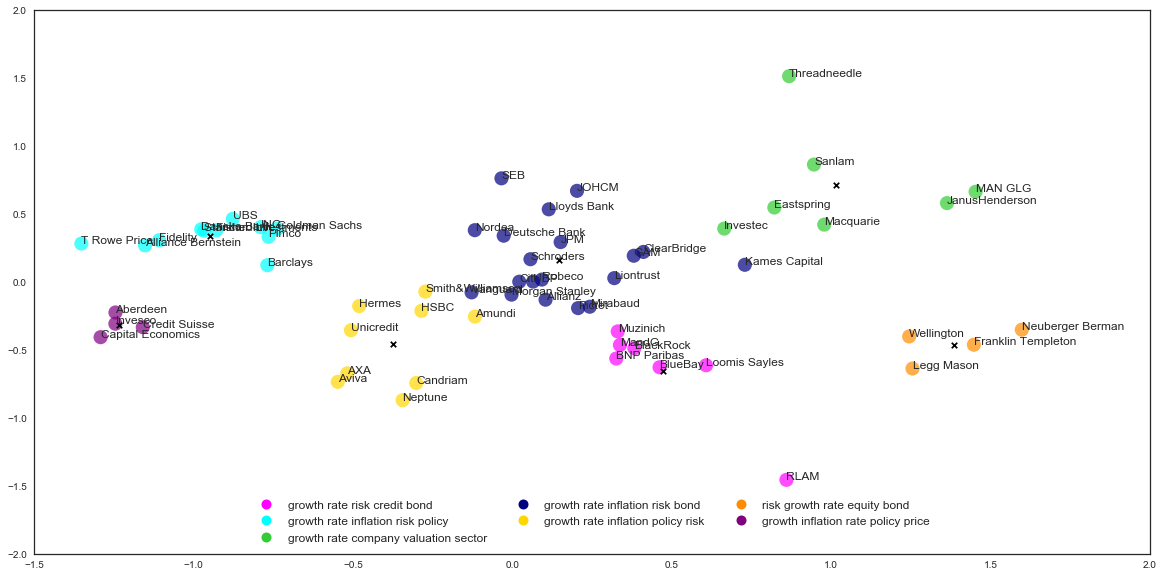

In [34]:
# visualise results

fig = plt.figure(figsize=(20,10))

sns.set_style("white")
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xlim(-1.5,2)
plt.ylim(-2,2)
plt.rcParams.update({'font.size': 12})
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)

ax1.scatter(red_df['X'], red_df['Y'], c=red_df['Colour'], marker='o', s=200,
            edgecolors='none', alpha=0.7,label='')
ax2.scatter(clu['Centroid_x'], clu['Centroid_y'], s=30, c='k', marker="x", label=clu['Words'])

import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import matplotlib.lines as mlines

line0 = mlines.Line2D([], [], color='magenta', marker='o', markersize=10, linestyle='None',label='')
line1 = mlines.Line2D([], [], color='cyan', marker='o', markersize=10, linestyle='None',label='')
line2 = mlines.Line2D([], [], color='limegreen', marker='o', markersize=10, linestyle='None', label='')
line3 = mlines.Line2D([], [], color='navy', marker='o', markersize=10, linestyle='None', label='')
line4 = mlines.Line2D([], [], color='gold', marker='o', markersize=10, linestyle='None', label='')
line5 = mlines.Line2D([], [], color='darkorange', marker='o', markersize=10, linestyle='None', label='')
line6 = mlines.Line2D([], [], color='purple', marker='o', markersize=10, linestyle='None', label='')

ax2.legend([line0, line1, line2, line3, line4, line5, line6],[c for c in clu['Words']],
         loc = 'lower center', ncol=3, labelspacing=0.5, fontsize=12)

for i in range(len(red_df)):
    ax1.text(red_df.ix[i]['X'], red_df.ix[i]['Y'], red_df.ix[i]['Names'], size=12)  

# LDA topic modelling

magenta: growth  rate  risk  inflation  equity  bond  policy  asset  credit  yield

cyan: growth  rate  price  risk  bond  equity  sector  term  yield  policy

limegreen: growth  rate  inflation  price  policy  risk  q  term  wage  interest


In [35]:
# prepare clusters for Latent Dirichlet Allocation

def prep_cluster(text):
    t = [[i for i in ls.split()] for ls in text[0]]
    return t


In [36]:
# edit number of clusters

cl_0 = prep_cluster(cluster_0)
cl_1 = prep_cluster(cluster_1)
cl_2 = prep_cluster(cluster_2)
cl_3 = prep_cluster(cluster_3)
cl_4 = prep_cluster(cluster_4)
cl_5 = prep_cluster(cluster_5)
cl_6 = prep_cluster(cluster_6)

In [37]:
# edit number of clusters

clusters = [cl_0, cl_1, cl_2, cl_3, cl_4, cl_5, cl_6]


In [38]:
# use Latent Dirichlet Allocation for topic modelling

from gensim import corpora, models 

def lda_model(words):
    for c in clusters:
        dictionary = corpora.Dictionary(c)
        corpus_lda = [dictionary.doc2bow(text) for text in c] 
        lda = models.LdaModel(corpus_lda, num_topics=1,  
                                id2word=dictionary) 
        topics_matrix = lda.show_topics(formatted=True, num_words=10)
        raw = raw_text(topics_matrix)
        stuff = ["'", "+", '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '*', '.', '"', ',']
        chars = [''.join([char for char in l if char not in stuff]) for l in raw]
        topics = pd.DataFrame(chars, columns = ['Words'])
        for w in topics.Words:
            print(w)
    return 

C:\Users\sonja tilly.ABERDEEN\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [39]:
lda_model(clusters)


 growth  rate  risk  credit  bond  inflation  yield  equity  policy  asset
 growth  rate  inflation  risk  policy  price  term  wage  forecast  cycle
 growth  rate  company  valuation  sector  equity  inflation  policy  stock  risk
 growth  rate  inflation  risk  bond  price  yield  policy  term  equity
 growth  rate  inflation  policy  risk  asset  credit  price  level  yield
 risk  growth  rate  equity  bond  asset  valuation  income  yield  inflation
 growth  inflation  rate  policy  price  commodity  interest  target  china  recovery


In [40]:
red_df.groupby(by='Colour', axis=0).mean()

,X,Y,Cluster
Colour,,,
cyan,-0.947122,0.338556,1
darkorange,1.386140,-0.462509,5
gold,-0.374794,-0.454351,4
limegreen,1.013451,0.712356,2
magenta,0.472161,-0.653287,0
navy,0.146727,0.161622,3
purple,-1.235042,-0.317307,6


# LDA topic modelling

magenta:  growth  rate  inflation  risk  equity  bond  policy  yield  asset  credit

cyan:  growth  rate  inflation  policy  risk  price  level  term  asset  equity

limegreen: growth  rate  inflation  risk  bond  policy  price  yield  term  stock


In [41]:
# generate ngrams

from nltk.util import ngrams
from collections import Counter

In [42]:
def ngram_counter(cluster):
    counts = Counter()
    for sent in cluster:
        counts.update(" ".join(n) for n in nltk.ngrams(sent, 2))
    #print(counts.most_common(3))
    #print(' ')
    return counts.most_common(5)

In [43]:
grams = []
for c in clusters:
    
    #print('Cluster',  clusters.index(c), ':')
    g = ngram_counter(c)
    grams.append(g)


In [44]:
grams

[[('interest rate', 47),
  ('government bond', 25),
  ('risk asset', 18),
  ('credit spread', 16),
  ('growth inflation', 16)],
 [('interest rate', 55),
  ('wage growth', 34),
  ('balance sheet', 32),
  ('growth rate', 30),
  ('growth inflation', 26)],
 [('interest rate', 39),
  ('balance sheet', 11),
  ('tax reform', 10),
  ('policy maker', 10),
  ('asset class', 10)],
 [('interest rate', 127),
  ('bond yield', 48),
  ('balance sheet', 42),
  ('earnings growth', 30),
  ('business cycle', 30)],
 [('interest rate', 41),
  ('rate hike', 31),
  ('balance sheet', 28),
  ('growth inflation', 21),
  ('oil price', 20)],
 [('interest rate', 20),
  ('government bond', 7),
  ('asset class', 7),
  ('rate hike', 6),
  ('risk asset', 6)],
 [('interest rate', 11),
  ('balance sheet', 5),
  ('inflation rate', 5),
  ('gdp growth', 4),
  ('commodity price', 4)]]

In [45]:
top_grams = []

for g in grams:
    for m in g:
        top_grams.append(m[0])
    

In [46]:
top_grams

['interest rate',
 'government bond',
 'risk asset',
 'credit spread',
 'growth inflation',
 'interest rate',
 'wage growth',
 'balance sheet',
 'growth rate',
 'growth inflation',
 'interest rate',
 'balance sheet',
 'tax reform',
 'policy maker',
 'asset class',
 'interest rate',
 'bond yield',
 'balance sheet',
 'earnings growth',
 'business cycle',
 'interest rate',
 'rate hike',
 'balance sheet',
 'growth inflation',
 'oil price',
 'interest rate',
 'government bond',
 'asset class',
 'rate hike',
 'risk asset',
 'interest rate',
 'balance sheet',
 'inflation rate',
 'gdp growth',
 'commodity price']

In [47]:
# edit number of clusters

clu['top_grams'] = [top_grams[0:5], top_grams[5:10], top_grams[10:15], top_grams[15:20],
                   top_grams[20:25], top_grams[25:30], top_grams[30:35]]

In [48]:
clu

,Words,Cluster,Centroid_x,Centroid_y,top_grams
0,growth rate risk credit bond,0,[0.472161212107],[-0.653286974445],"[interest rate, government bond, risk asset, c..."
1,growth rate inflation risk policy,1,[-0.947122374845],[0.338555957206],"[interest rate, wage growth, balance sheet, gr..."
2,growth rate company valuation sector,2,[1.01345070204],[0.712356422134],"[interest rate, balance sheet, tax reform, pol..."
3,growth rate inflation risk bond,3,[0.146727168353],[0.161622114172],"[interest rate, bond yield, balance sheet, ear..."
4,growth rate inflation policy risk,4,[-0.374793744561],[-0.454350922554],"[interest rate, rate hike, balance sheet, grow..."
5,risk growth rate equity bond,5,[1.38613958449],[-0.462508954314],"[interest rate, government bond, asset class, ..."
6,growth inflation rate policy price,6,[-1.23504202785],[-0.317306928029],"[interest rate, balance sheet, inflation rate,..."


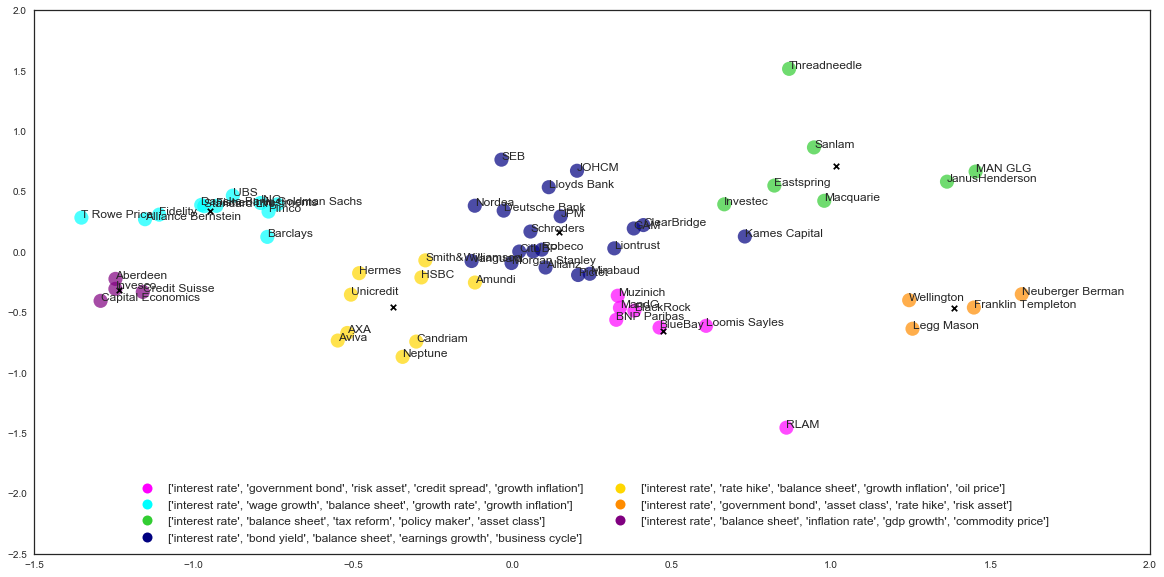

In [49]:
# visualise results with n_grams

fig = plt.figure(figsize=(20,10))

sns.set_style("white")
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xlim(-1.5,2)
plt.ylim(-2.5,2)
plt.rcParams.update({'font.size': 12})
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)

ax1.scatter(red_df['X'], red_df['Y'], c=red_df['Colour'], marker='o', s=200,
            edgecolors='none', alpha=0.7,label='')
ax2.scatter(clu['Centroid_x'], clu['Centroid_y'], s=30, c='k', marker="x", label=clu['top_grams'])

import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import matplotlib.lines as mlines

line0 = mlines.Line2D([], [], color='magenta', marker='o', markersize=10, linestyle='None',label='')
line1 = mlines.Line2D([], [], color='cyan', marker='o', markersize=10, linestyle='None',label='')
line2 = mlines.Line2D([], [], color='limegreen', marker='o', markersize=10, linestyle='None', label='')
line3 = mlines.Line2D([], [], color='navy', marker='o', markersize=10, linestyle='None', label='')
line4 = mlines.Line2D([], [], color='gold', marker='o', markersize=10, linestyle='None', label='')
line5 = mlines.Line2D([], [], color='darkorange', marker='o', markersize=10, linestyle='None', label='')
line6 = mlines.Line2D([], [], color='purple', marker='o', markersize=10, linestyle='None', label='')

ax2.legend([line0, line1, line2, line3, line4, line5, line6],[c for c in clu['top_grams']],
         loc = 'lower center', ncol=2, labelspacing=0.5, fontsize=12)

for i in range(len(red_df)):
    ax1.text(red_df.ix[i]['X'], red_df.ix[i]['Y'], red_df.ix[i]['Names'], size=12)  